<a href="https://colab.research.google.com/github/sunyiming2016/Business-Data-Analytics/blob/master/CNN_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fan Bu
MSIS 549 HW2

# CNN to recognize Rock/ Paper/ Scissors

Train a convolution neural network to recognize gesture Rock/ Paper/ Scissors. 

## Load Rock / Paper / Scissors Dataset
Download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-01-12 04:12:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  88.6MB/s    in 2.2s    

2021-01-12 04:12:29 (88.6 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-01-12 04:12:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [3]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


After running the folloiwng code, I should have exactly 840 images for each gesture. 

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-075.png', 'rock05ck01-054.png', 'rock04-086.png', 'rock07-k03-104.png', 'rock01-065.png', 'rock03-025.png', 'rock03-005.png', 'rock07-k03-081.png', 'rock05ck01-107.png', 'rock05ck01-041.png']
['paper01-066.png', 'paper07-097.png', 'paper02-008.png', 'paper07-091.png', 'paper06-107.png', 'paper03-061.png', 'paper01-056.png', 'paper06-104.png', 'paper06-073.png', 'paper01-050.png']
['scissors03-054.png', 'testscissors03-090.png', 'testscissors03-001.png', 'scissors04-059.png', 'scissors03-070.png', 'testscissors01-052.png', 'testscissors03-047.png', 'scissors04-097.png', 'scissors02-087.png', 'testscissors03-010.png']


In [23]:
import shutil
import os #these are just to deal with data directories

In [6]:
#for setting test data aside 
test_dir = os.path.join('/tmp/rps-test-set')

# Directory with our test rock pictures
test_rock_dir = os.path.join(test_dir, 'rock')

# Directory with our test paper pictures
test_paper_dir = os.path.join(test_dir, 'paper')

# Directory with our test scissors pictures
test_scissors_dir = os.path.join(test_dir, 'scissors')


In [24]:
#train & validation split
base_dir = '/tmp/rps_trainvalidation'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [25]:
# Directories for our training & validation 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


In [26]:
# Directory with our training rock pictures
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)

# Directory with our training paper pictures
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

# Directory with our training scissors pictures
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

In [27]:
#Directory with our validation rock pictures
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)

# Directory with our validation paper pictures
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

# Directory with our validation scissors pictures
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

In [28]:
#840 pics for each category, use 70%/30% split for train(588)/valdation(252)
#rock train&validation
for f in rock_files[:588]:
    source= os.path.join(rock_dir,f)
    destination = os.path.join(train_rock_dir,f)
    shutil.copyfile(source,destination)

for f in rock_files[-252:]:
    source= os.path.join(rock_dir,f)
    destination = os.path.join(validation_rock_dir,f)
    shutil.copyfile(source,destination)



In [29]:
#paper train&validation
for f in paper_files[:588]:
    source= os.path.join(paper_dir,f)
    destination = os.path.join(train_paper_dir,f)
    shutil.copyfile(source,destination)

for f in paper_files[-252:]:
    source= os.path.join(paper_dir,f)
    destination = os.path.join(validation_paper_dir,f)
    shutil.copyfile(source,destination)

In [30]:
#scissors train&validation
for f in scissors_files[:588]:
    source= os.path.join(scissors_dir,f)
    destination = os.path.join(train_scissors_dir,f)
    shutil.copyfile(source,destination)

for f in scissors_files[-252:]:
    source= os.path.join(scissors_dir,f)
    destination = os.path.join(validation_scissors_dir,f)
    shutil.copyfile(source,destination)

In [31]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

total training rock images: 588
total training paper images: 588
total training scissors images: 588


In [32]:
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

total validation rock images: 252
total validation paper images: 252
total validation scissors images: 252


In [33]:
print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_rock_dir)))
print('total test scissors images:', len(os.listdir(test_rock_dir)))

total test rock images: 124
total test paper images: 124
total test scissors images: 124


## Build Convolution Neural Network


In [ ]:
from keras import layers
from keras import models

In [17]:
#using input shape 128 x128
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#use softmax
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale=1./255)


validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [20]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [35]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/5
100/100 [==============================] - 14s 137ms/step - loss: 0.5264 - acc: 0.7833 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 2/5
100/100 [==============================] - 7s 66ms/step - loss: 0.0535 - acc: 0.9889 - val_loss: 7.5943e-04 - val_acc: 1.0000
Epoch 3/5
100/100 [==============================] - 7s 65ms/step - loss: 6.5233e-05 - acc: 1.0000 - val_loss: 4.8097e-05 - val_acc: 1.0000
Epoch 4/5
100/100 [==============================] - 7s 66ms/step - loss: 0.0353 - acc: 0.9909 - val_loss: 2.1453e-05 - val_acc: 1.0000
Epoch 5/5
100/100 [==============================] - 7s 67ms/step - loss: 0.0524 - acc: 0.9950 - val_loss: 2.4820e-04 - val_acc: 1.0000


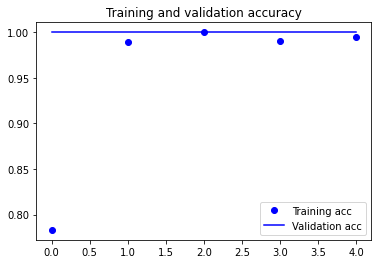

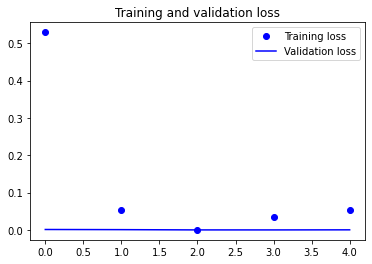

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
model_score = model.evaluate_generator(test_generator)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 0.3514501750469208
Model Test Accuracy: 0.801075279712677


## Use the best model to classify gestures
Now run the following code and use the model you trained to classify images uploaded.  

In [38]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

Saving download (1).jpg to download (1).jpg


In [39]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)




download (1).jpg
[[1. 0. 0.]]


In [ ]:
#the result is correct 